In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy

train_df = pd.read_csv("data/train.csv")
train_df.drop(columns='id', inplace=True)

X_train = train_df.iloc[:, :-1]

In [53]:
def date_converter(df):
    df = deepcopy(df)
    for col in ['orderDate', 'deliveryDate', 'dateOfBirth', 'creationDate']:
        df[col] = pd.to_datetime(df[col], errors='coerce')
    return df


def get_age_at_order(df):
    df = deepcopy(df)
    df['age_at_order'] = np.floor((df['orderDate'] - df['dateOfBirth']) / np.timedelta64(1, 'Y'))
    return df

In [54]:
X_train_clean = date_converter(X_train)
X_train_clean = get_age_at_order(X_train_clean)

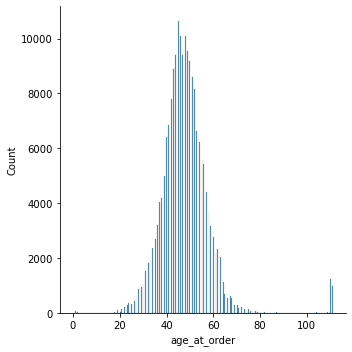

In [56]:
sns.displot(X_train_clean['age_at_order'])